<a href="https://colab.research.google.com/github/zzhining/python_ml_dl/blob/main/7_2_CNN_MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.2 CNN 기반 인공신경망 학습하기


**MNIST 숫자 이미지 분류기 생성을 위한 작업 흐름도**

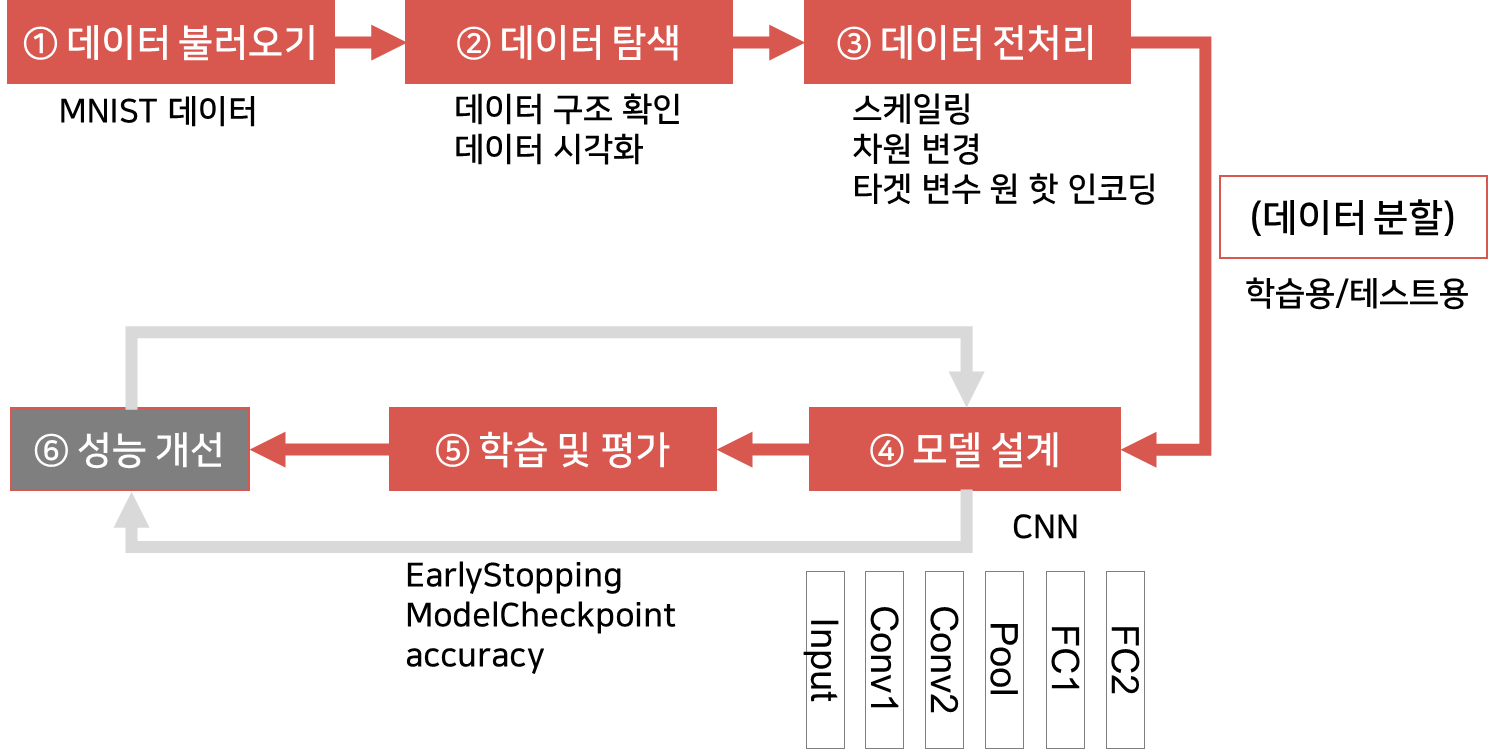


## 7.2.1 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import mnist

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 구조 확인
print("X_train:{}, Y_train:{}\nX_test:{}, Y_test:{}"\
      .format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train:(60000, 28, 28), Y_train:(60000,)
X_test:(10000, 28, 28), Y_test:(10000,)


## 7.2.2 데이터 탐색

In [2]:
X_train[-1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38,  48,  48,  22,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  97, 198, 243, 254, 254, 212,  27,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67,
        172, 254, 254, 225, 218, 218, 237, 248,  40,   0,  21, 164, 187,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 219,
        254,  97,  67,  14,   0,   0,  92, 231, 122,  23, 203, 236,  59,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 217, 242,
         92,   4,   0,   0,   0,   0,   4, 147, 253, 240, 232,  92,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 101, 255,  92,
          0,   0,   0,   0,   0,   0, 105, 254, 254, 177,  11,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 244,  41,
          0,   0,   0,   7,  76, 199, 238, 239,  94,  10,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 121,   0,
          0,   2,  63, 180, 254, 233, 126,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 190, 196,  14,
          2,  97, 254, 252, 146,  52,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 225,  71,
        180, 232, 181,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 254, 254,
        230,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   6,  77, 244, 254, 162,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 110, 254, 218, 254, 116,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 131, 254, 154,  28, 213,  86,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  66, 209, 153,  19,  19, 233,  60,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 142, 254, 165,   0,  14, 216, 167,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  90, 254, 175,   0,  18, 229,  92,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 229, 249, 176, 222, 244,  44,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [3]:
Y_train[-1]

8

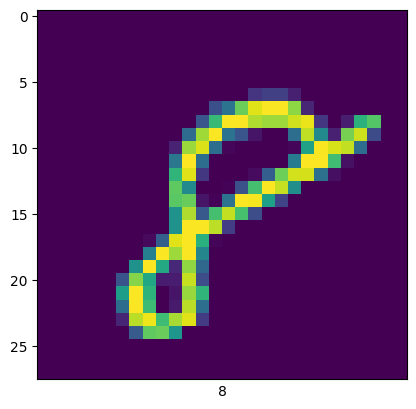

In [4]:
import matplotlib.pyplot as plt

# 가장 마지막에 담겨있는 데이터를 이미지로 출력하기
plt.imshow(X_train[-1])
plt.xlabel(Y_train[-1])
plt.xticks([])
plt.show()

In [5]:
for i in X_train[-1]:
    for j in i:
        print('{:4d}'.format(j), end="")
    print("\n")

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48  48  22   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254 254 212  27   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 254 225 218 218 237 248  40

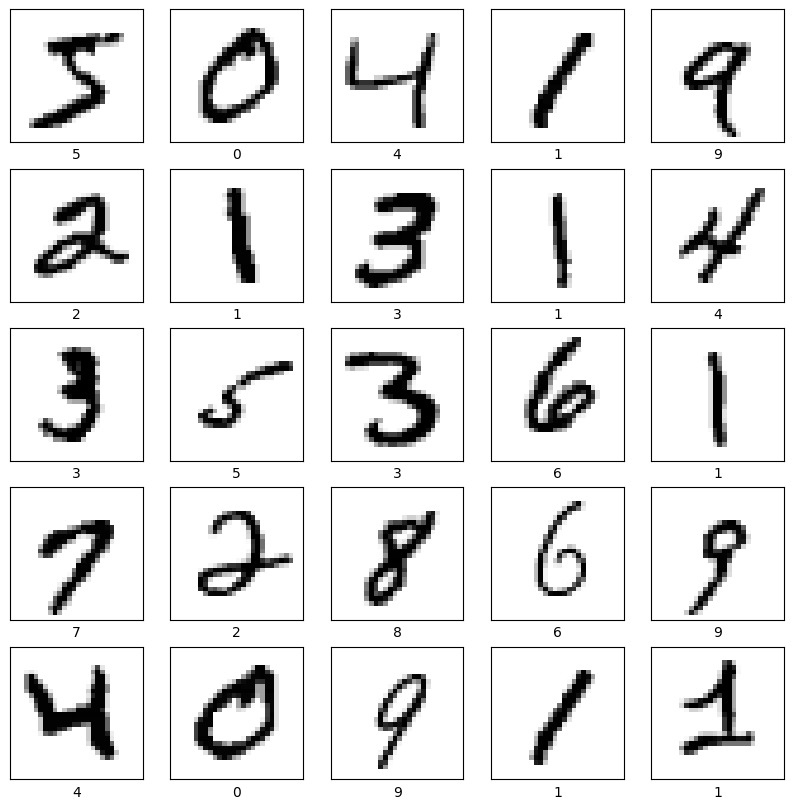

In [6]:
# 상위 25개 데이터를 레이블과 함께 출력하기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    # 숫자 이미지 출력
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # 레이블 출력
    plt.xlabel(Y_train[i])
plt.show()

## 7.2.3 데이터 전처리

In [7]:
# 스케일링
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# 차원 변경
X_train = X_train.reshape(X_train.shape[0],
                          X_train.shape[1],
                          X_train.shape[2],
                          1)
X_test = X_test.reshape(X_test.shape[0],
                        X_test.shape[1],
                        X_test.shape[2],
                        1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
import numpy as np
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical
# 원핫벡터 형태로 변환
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [11]:
Y_train[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

## 7.2.4 모델 설계

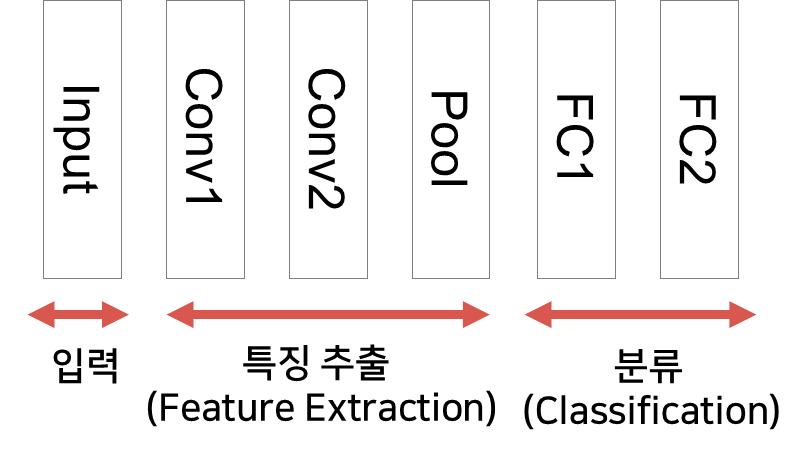

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# CNN 모델 설계
model = Sequential()
# Conv1
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(28, 28, 1),
                 activation='relu',
                 name = 'Conv1'))
# Conv2
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 name = 'Conv2'))
# Pool
model.add(MaxPooling2D(pool_size=2, name = 'Pool'))
model.add(Dropout(0.25))
model.add(Flatten())
# FC1
model.add(Dense(128,  activation='relu', name = 'FC1'))
model.add(Dropout(0.5))
# FC2
model.add(Dense(10, activation='softmax',name = 'FC2'))

# 모델 컴파일 – 손실함수, 옵티마이저, 평가 메트릭 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool (MaxPooling2D)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC2 (Dense)                          │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

## 7.2.5 학습 및 평가

In [17]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습 결과를 저장하기 위한 환경 설정정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.2f}.weights.h5"

# 학습 중 모니터링 할 조건 설정
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True,
                               save_weights_only=True)

# 학습의 이른 종료를 위한 조건 설정정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# 학습
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/30
298/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8233 - loss: 0.5533
Epoch 1: val_loss improved from inf to 0.05920, saving model to ./model/01-0.06.weights.h5
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8243 - loss: 0.5505 - val_accuracy: 0.9822 - val_loss: 0.0592
Epoch 2/30
295/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9724 - loss: 0.0939
Epoch 2: val_loss improved from 0.05920 to 0.04039, saving model to ./model/02-0.04.weights.h5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9724 - loss: 0.0938 - val_accuracy: 0.9862 - val_loss: 0.0404
Epoch 3/30
295/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9792 - loss: 0.0685
Epoch 3: val_loss improved from 0.04039 to 0.03319, saving model to ./model/03-0.03.weights.h5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9792 - loss: 0.0684 - val_accuracy: 0.9890 - val_loss: 0.0332
Epoch 4/30
295/300 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9830 - loss: 0.0546
Epoch 4: val_loss impr

In [19]:
history.history

{'accuracy': [0.9163166880607605,
  0.9736666679382324,
  0.9801666736602783,
  0.9838500022888184,
  0.9855999946594238,
  0.9869499802589417,
  0.9882166385650635,
  0.9901333451271057,
  0.9903833270072937,
  0.9911666512489319,
  0.9924833178520203,
  0.9926499724388123,
  0.9928833246231079,
  0.9936333298683167,
  0.9935500025749207,
  0.9942499995231628,
  0.9943833351135254,
  0.9946333169937134,
  0.9953333139419556,
  0.9951666593551636,
  0.9950166940689087,
  0.9952666759490967,
  0.9958166480064392,
  0.9956499934196472],
 'loss': [0.2729959785938263,
  0.08932660520076752,
  0.06485412269830704,
  0.053209468722343445,
  0.04654667526483536,
  0.04124971479177475,
  0.03613734990358353,
  0.03064868226647377,
  0.02881600148975849,
  0.02646961621940136,
  0.023897048085927963,
  0.023140115663409233,
  0.02157125063240528,
  0.019351279363036156,
  0.01803893968462944,
  0.017002912238240242,
  0.016452696174383163,
  0.01600068248808384,
  0.014405285008251667,
  0.0143

<Axes: xlabel='epochs', ylabel='val_loss'>

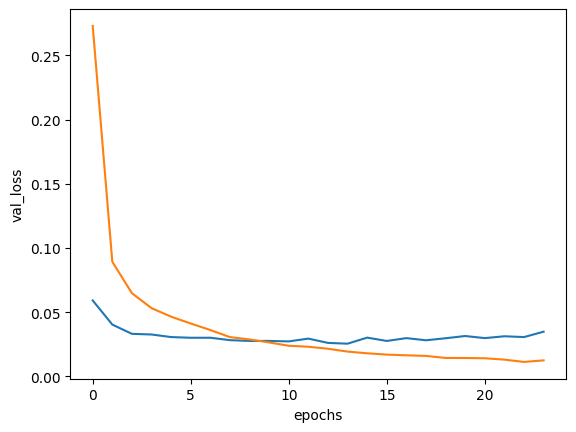

In [20]:
import pandas as pd
import seaborn as sns

accuracy =  history.history['accuracy']
loss =  history.history['loss']
val_accuracy =  history.history['val_accuracy']
val_loss =  history.history['val_loss']

# 데이터 프레임 생성
df = pd.DataFrame({'epochs' : range(len(accuracy)),
                   'accuracy': accuracy, 'loss': loss,
                   'val_accuracy': val_accuracy, 'val_loss': val_loss})

# epochs에 따른 loss값의 변화 시각화
sns.lineplot(x= df['epochs'], y = df['val_loss'])
sns.lineplot(x= df['epochs'], y = df['loss'])